In [1]:
# install all the necessary packages and access their respective libraries
install.packages("twitteR")
install.packages("ggmap")
install.packages("maptools")
install.packages("maps")
library(twitteR)
library(maps)
library("maptools")
library(ggmap)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("maps"):
“installation of package ‘maps’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Loading required package: ggplot2


In [2]:
#connect to the twitter API using the credentials
setup_twitter_oauth("API key","API Secret","Access Token","Access Secret")

[1] "Using direct authentication"


In [ ]:
#use a variable for the search term
searchterm="#SB51 OR #SuperBowl51"

#collect 20000 tweets on the search term
tweets<-searchTwitter(searchterm,n=20000)

#convert the tweets into a dataframe
tweets.df<-twListToDF(tweets)

#look for user screen names from the dataframe
username<-lookupUsers(tweets.df$screenName)

#convert the acquired user info into a dataframe
tweetusername<-twListToDF(username)

#get the location information of users
tweetloc<-tweetusername[!is.na(tweetusername$location),]
nrow(tweetloc)

#filter out the tweets with blank locations and store them in a file.
tweetloc<-tweetloc[!tweetloc$location=="",]
write.csv(tweetloc,file="LocationTweets.csv")

In [35]:
# read the rows from the above file as per the need by using skip and nrows function.
a<-read.csv(file="LocationTweets.csv",skip=6860,nrows=20,header=FALSE)

In [36]:
#retrive the location information from the file
collected <- as.character(a$V13)

In [37]:
#Colelct the geo coordinates for each location and separate the longitude and latitude of each point.
ll.collected <- geocode(collected, override=TRUE)
collected.x <- ll.collected$lon
collected.y <- ll.collected$lat

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Perth&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ohio,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Massachusetts&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DeSoto,%20Tx&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fairfax,%20VA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=GSK-SBY-MKS&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "GSK-SBY-MKS"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=TheMusicalLandOfMyOddMind&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, l

In [40]:
#store the colected co-ordinates after removing NA fields
ll.collected<-ll.collected[!is.na(ll.collected$lon),]
write.csv(ll.collected,file="llcollect.csv")

In [47]:
#adjust the rows and columns and write the data to a file
ll.collected<-read.csv("llcollect.csv")
ll.collected <- ll.collected[,c(2,3)]
write.csv(ll.collected, file="llvisit1.csv")


In [43]:
#read the files and combine data into 1 single file

file1 <- read.csv("llvisit1.csv", header=T, sep=",")
file2 <- read.csv("llvisited.csv", header=T, sep=",")

dim(file1)
dim(file2)

datafile <- rbind(file1,file2)
dim(datafile)

write.csv(datafile, file="llvisited.csv")

[1] 18  3

[1] 5088    3

[1] 5106    3

In [44]:
#read the above file
a<-read.csv(file="llvisited.csv")

In [13]:
#use this package to get the frequency of terms.
install.packages('plyr')
library(plyr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘plyr’

The following object is masked from ‘package:maps’:

    ozone

The following object is masked from ‘package:twitteR’:

    id



In [45]:
#compute the frequency of each co-ordinate
y<-count(a,c("lon","lat"))

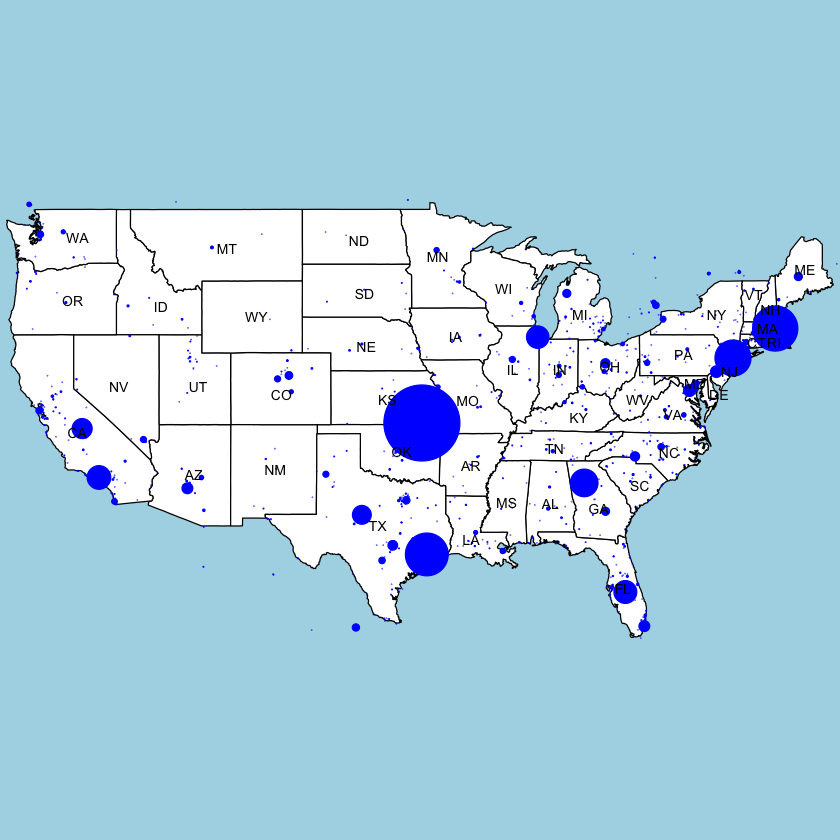

In [46]:
#use the map function to plot the points on the map. 
map("state", fill=TRUE, col="white", bg="lightblue", mar=c(0,0,0,0))

#use the points function to relate the points with their frequency
points(y$lon,y$lat, col="blue", pch=20, cex=y$freq/15)

#use text function to signify the state names.
text(x=state.center$x,y=state.center$y,state.abb,cex=0.7)

# References:
### http://geoffjentry.hexdump.org/twitteR.pdf
### https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/par.html
### https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/points.html
### https://stat.ethz.ch/R-manual/R-devel/library/base/html/options.html
### http://stat.ethz.ch/R-manual/R-devel/library/base/html/cbind.html